In [1]:
library(zoo)
library(tseries)
library(urca)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
series <- read.table(file = "datostesis.txt", header = TRUE, sep = "	", stringsAsFactors = FALSE)
head(series)

Tiempo,PIB,IBIF,IPC
1993 - 1,400232.7,63263.84,8.709532
1993 - 2,411651.1,68815.95,8.977918
1993 - 3,419926.3,72654.67,9.082479
1993 - 4,423308.6,75250.87,9.137843
1994 - 1,429325.3,76981.68,9.159471
1994 - 2,438204.8,80641.76,9.249246


In [3]:
tiempo <- series$Tiempo
tiempo <- as.yearqtr(format(tiempo), "%Y - %q")
pib <- series$PIB
ibif <- series$IBIF
ipc <- series$IPC
head(tiempo)

[1] "1993 Q1" "1993 Q2" "1993 Q3" "1993 Q4" "1994 Q1" "1994 Q2"

Aplico logaritmos para suavizar las series

In [4]:
log_pib <- log(pib)
log_ibif <- log(ibif)
log_ipc <- log(ipc)

## Sobre la serie de IPC

Viendo el gráfico de la serie de IPC parecería que tiene una tendencia determinística de orden mayor a la lineal. 

Le saco esta tendencia restandole el fit de un polinomio de orden 2 (ya de orden 3 me da no significativos).  

La nueva variable es log_ipcdt

In [5]:
polfit_log_ipc <- lm(log_ipc ~ poly(tiempo, 2, raw=TRUE))
summary(polfit_log_ipc)


Call:
lm(formula = log_ipc ~ poly(tiempo, 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20334 -0.08773 -0.00058  0.08388  0.23086 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.619e+04  5.995e+02   43.69   <2e-16 ***
poly(tiempo, 2, raw = TRUE)1 -2.622e+01  5.973e-01  -43.90   <2e-16 ***
poly(tiempo, 2, raw = TRUE)2  6.564e-03  1.488e-04   44.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1004 on 113 degrees of freedom
Multiple R-squared:  0.9929,	Adjusted R-squared:  0.9927 
F-statistic:  7859 on 2 and 113 DF,  p-value: < 2.2e-16


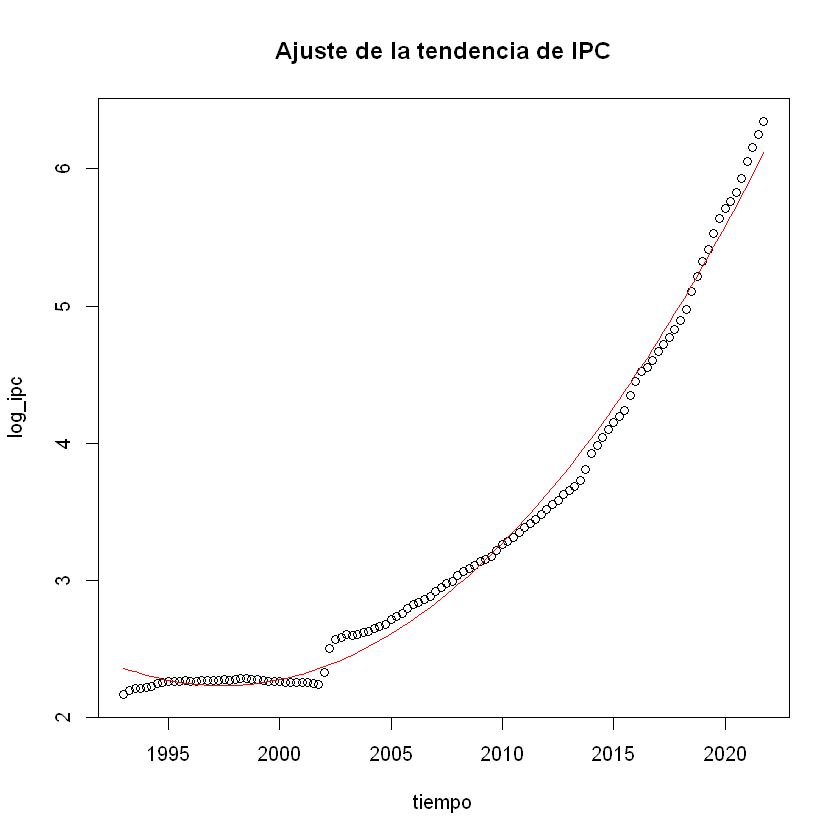

In [6]:
plot(log_ipc ~ tiempo, main = "Ajuste de la tendencia de IPC")
lines(fitted(polfit_log_ipc) ~ tiempo, col = "red")

In [7]:
log_ipcdt <- polfit_log_ipc$residuals

# Test de Raíz unitaria

## Dickey Fuller Aumentado

In [8]:
adf_log_ipc <- ur.df(log_ipc, type="trend", selectlags = "AIC")
summary(adf_log_ipc)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036662 -0.007904 -0.002775  0.002150  0.117338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0151033  0.0085249  -1.772   0.0792 .  
z.lag.1      0.0058134  0.0050148   1.159   0.2489    
tt           0.0002202  0.0001628   1.352   0.1790    
z.diff.lag   0.5393673  0.0818892   6.587  1.6e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02036 on 110 degrees of freedom
Multiple R-squared:  0.7153,	Adjusted R-squared:  0.7076 
F-statistic: 92.14 on 3 and 110 DF,  p-value: < 2.2e-16


Value of test-statistic is: 1.1593 9.2645 10.4823 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3

### Test usando las variables diferenciadas:

In [9]:
dif_log_pib <- diff(log_pib)
dif_log_ibif <- (diff(log_ibif))
dif_log_ipc <- (diff(log_ipc))
dif_log_ipcdt <- (diff(log_ipcdt))

In [10]:
adf_dif_log_ipcdt <- ur.df(dif_log_ipcdt, type="trend", selectlags = "AIC")
summary(adf_dif_log_ipcdt)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045286 -0.009684 -0.003836  0.005542  0.090449 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.908e-04  3.739e-03   0.078 0.938143    
z.lag.1     -5.602e-01  8.260e-02  -6.783 6.36e-10 ***
tt           2.648e-05  5.614e-05   0.472 0.638016    
z.diff.lag   3.240e-01  8.950e-02   3.620 0.000449 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01945 on 109 degrees of freedom
Multiple R-squared:  0.2991,	Adjusted R-squared:  0.2799 
F-statistic: 15.51 on 3 and 109 DF,  p-value: 1.809e-08


Value of test-statistic is: -6.7825 15.3639 23.0457 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 

## Test de Zivot-Andrews

Los quiebres estructurales suelen dar una pérdida de potencia a los test clásicos de ADF. A partir de Perron (1989) se ve que las series pueden ser estacionarias con algún cambio estructural en la tendencia determinística o en el intercepto. Estos fenómenos tienen un efecto de sobreestimación en los test de Dickey-Fuller. La ventaja del los tests ZA sobre los de Perron es que los posibles quiebres estructurales se estiman de manera endógena a partir del valor mínimo del estadístico $T$.

In [11]:
za.log_ipc <- ur.za(log_ipc, model="intercept", lag=2) 
summary(za.log_ipc)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033690 -0.009143 -0.001890  0.003123  0.093477 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0073154  0.0124097  -0.589   0.5568    
y.l1         1.0013520  0.0070972 141.092  < 2e-16 ***
trend        0.0004070  0.0001923   2.116   0.0367 *  
y.dl1        0.7127064  0.0896589   7.949 2.05e-12 ***
y.dl2       -0.3693253  0.0898518  -4.110 7.76e-05 ***
du           0.0189203  0.0102086   1.853   0.0666 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01888 on 107 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 8.724e+04 on 5 and 107 DF,  p-value: < 2.2e-16


Teststatistic: 0.1905 
Critical values: 0.01= -5.34 0.05= -4

In [12]:
AIC(eval(attributes(za.log_ipc)$testreg))

[1] -568.5769

In [13]:
za.dif_log_ipcdt <- ur.za(dif_log_ipcdt, model="intercept", lag = 1) 
summary(za.dif_log_ipcdt)


################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034186 -0.009333 -0.002111  0.003510  0.093147 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.108e-03  4.016e-03   1.272  0.20618    
y.l1         3.471e-01  8.586e-02   4.043 9.93e-05 ***
trend       -9.619e-05  6.848e-05  -1.405  0.16303    
y.dl1        3.660e-01  8.770e-02   4.173 6.11e-05 ***
du           2.034e-02  6.927e-03   2.937  0.00405 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0188 on 108 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.4491,	Adjusted R-squared:  0.4287 
F-statistic: 22.01 on 4 and 108 DF,  p-value: 2.623e-13


Teststatistic: -7.604 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 100 


# Resultados

Para determinar los lags usé el criterio de información de Akaike.

### ADF test

|            |random walk| intercepto | intercepto y tendencia | Dif random wal | Dif intercepto | Dif intercepto ytendencia|
| ---          |---        |    ---     |        ---             |       ---      |      ---       | ---
|log (pib) |  $$I(1)$$  |  $$I(1)$$    |        $$I(1)$$          | $$I(0)$$      |   $$I(0)$$     |  $$I(0)$$| 
|log (ibif)|  $$I(1)$$  |  $$I(1)$$    |        $$I(1)$$          | $$I(0)$$      |  $$I(0)$$      |  $$I(0)$$|
|log (ipc) |  $$I(1)$$  |  $$I(1)$$    |        $$I(1)$$          | $$I(0)**$$    |  $$I(0)$$      |  $$I(0)$$| 
|log (ipc dt)| $$I(1)^*$$   |  $$I(1)$$    |        $$I(1)$$       | $$I(0)$$     | $$I(0)$$       |  $$I(0)$$| 

*Solo para un nivel de significación de 0.01

**Para un nivel de significación de 0.05 

### ZA test

|              | intercepto | tendencia| intercepto y tendencia| Diff intercepto| Diff tendencia | Diff interceto y tendencia|
| ---          |    ---     |        --- |          ---           | ---              |    ---    | ---|
|log (pib) |  $$I(1)$$    |     $$I(1)$$   |        $$I(1)$$        | $$I(0)$$         | $$I(0)$$| $$I(0)$$|
|log (ibif)|  $$I(1)$$    |        $$I(1)$$|        $$I(1)$$        |   $$I(0)$$       | $$I(0)$$| $$I(0)$$|
|log (ipc) |  $$I(1)$$    |        $$I(1)$$|        $$I(1)$$        | $$I(0)$$       | $$I(0)$$| $$I(0)$$|
|log (ipc dt) |  $$I(1)$$ |      $$I(1)$$  |           $$I(1)$$     | $$I(0)$$       | $$I(0)$$| $$I(0)$$|


## Comparo las series de IPC en diferencias

Parecería que log_ipcdt resulta más apropiada porque decae más rápido que log_ipc.

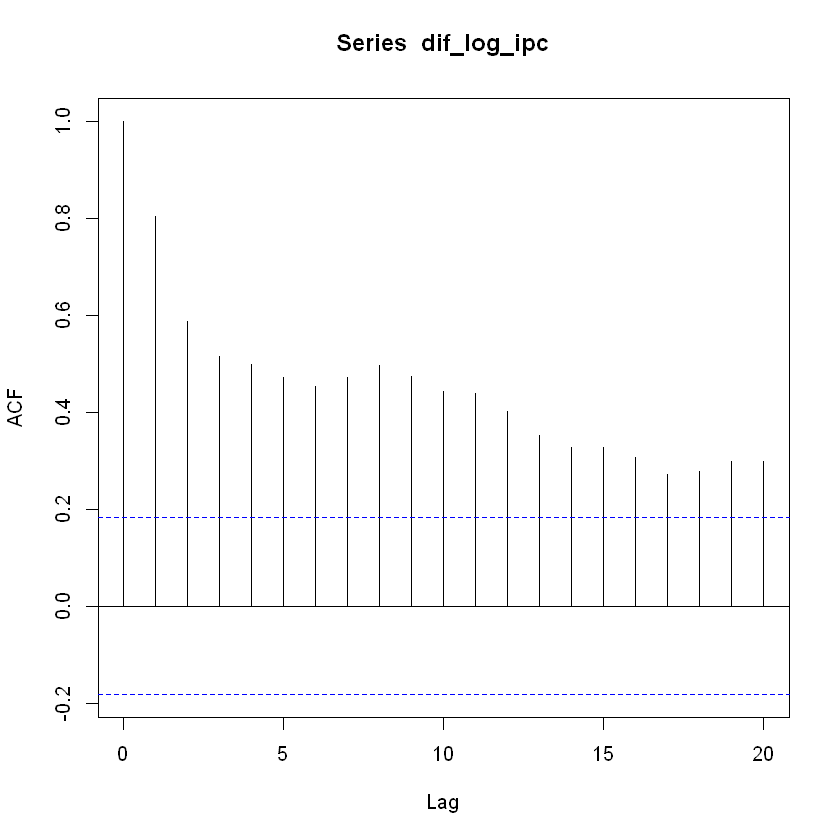

In [14]:
acf(dif_log_ipc)

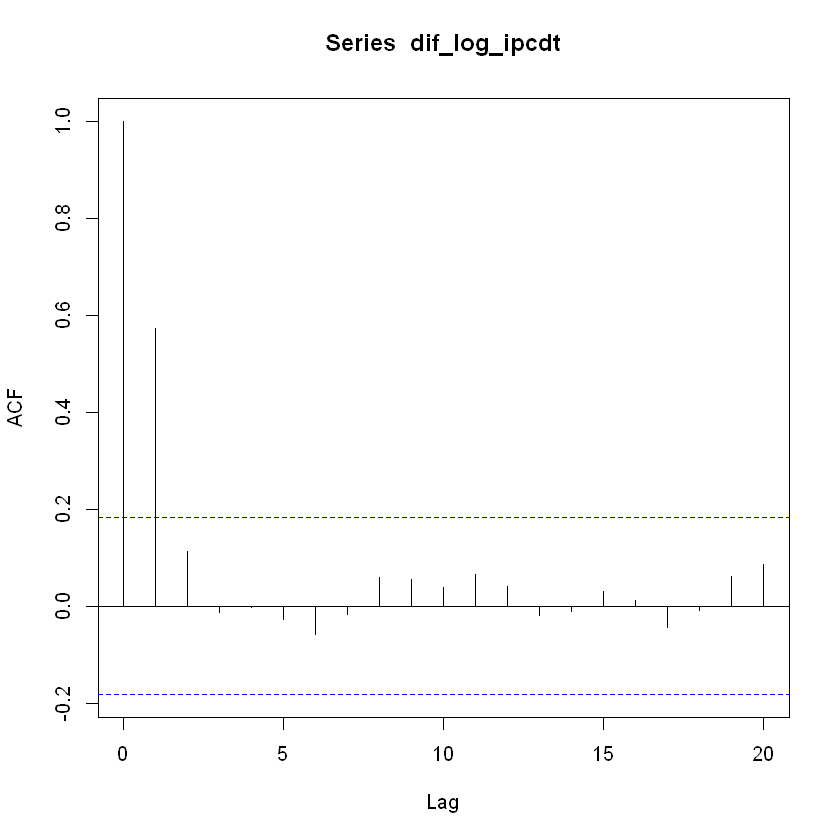

In [15]:
acf(dif_log_ipcdt)

# La series en diferencias

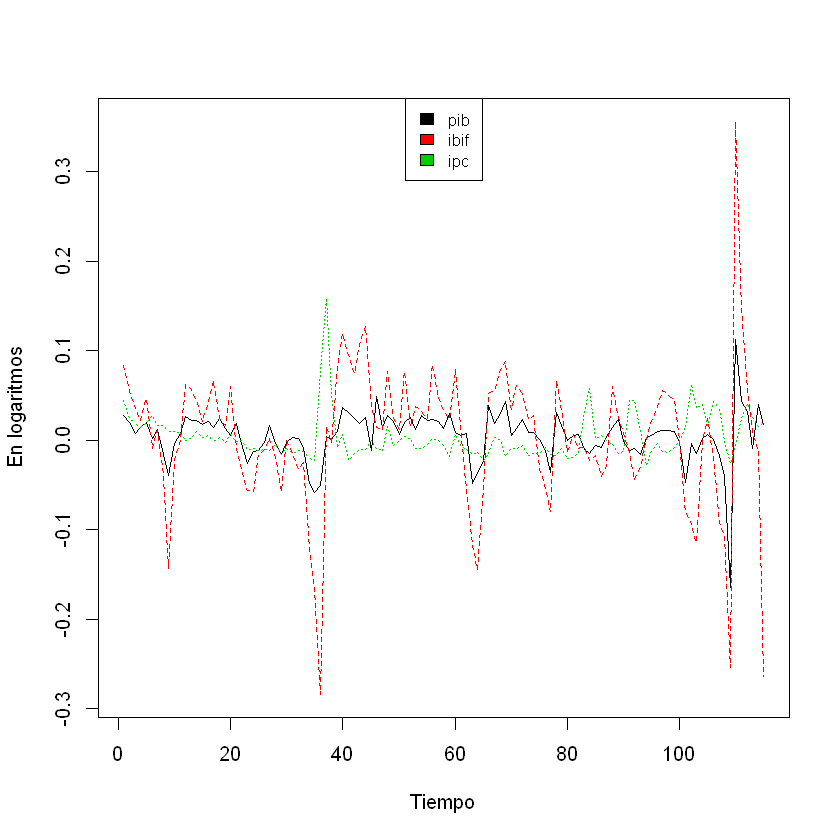

In [16]:
cols <- c("pib", "ibif", "ipc") 
matplot(cbind(dif_log_pib, dif_log_ibif, dif_log_ipcdt), xlab = "Tiempo", ylab = "En logaritmos",  type = "l")
legend("top", cols, col=seq_len(3),cex=0.8,fill=seq_len(3))